# Housing Regression

This notebook predicts housing prices in the Kaggle pratice competition "House Prices: Advanced Regression Techniques."

## Get Data

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
PATH = '/kaggle/input/house-prices-advanced-regression-techniques/'

In [3]:
data = pd.read_csv(PATH + 'train.csv')
test = pd.read_csv(PATH + 'test.csv')
data = data.sample(frac=1).reset_index(drop=True)

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,924,120,RL,50.0,8012,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,193000
1,1242,20,RL,83.0,9849,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,New,Partial,248328
2,1200,20,RL,75.0,11235,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,148000
3,446,20,RL,73.0,9855,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,11,2009,COD,Normal,127500
4,803,60,RL,63.0,8199,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2008,WD,Normal,189000


## Feature Handling

In [4]:
data.drop('Id', axis = 1, inplace=True)

In [5]:
def combineFeatures(df):
    
    #Total Floor area of entire house
    df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

    #Total number of baths
    df['TotalBath'] = df['FullBath'] + df['HalfBath'] + df['BsmtFullBath'] + df['BsmtHalfBath']

    #Total porch area
    df['TotalPorchSF'] = df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] + df['ScreenPorch'] + df['WoodDeckSF']

combineFeatures(data)
combineFeatures(test)

## Analyze Correlations

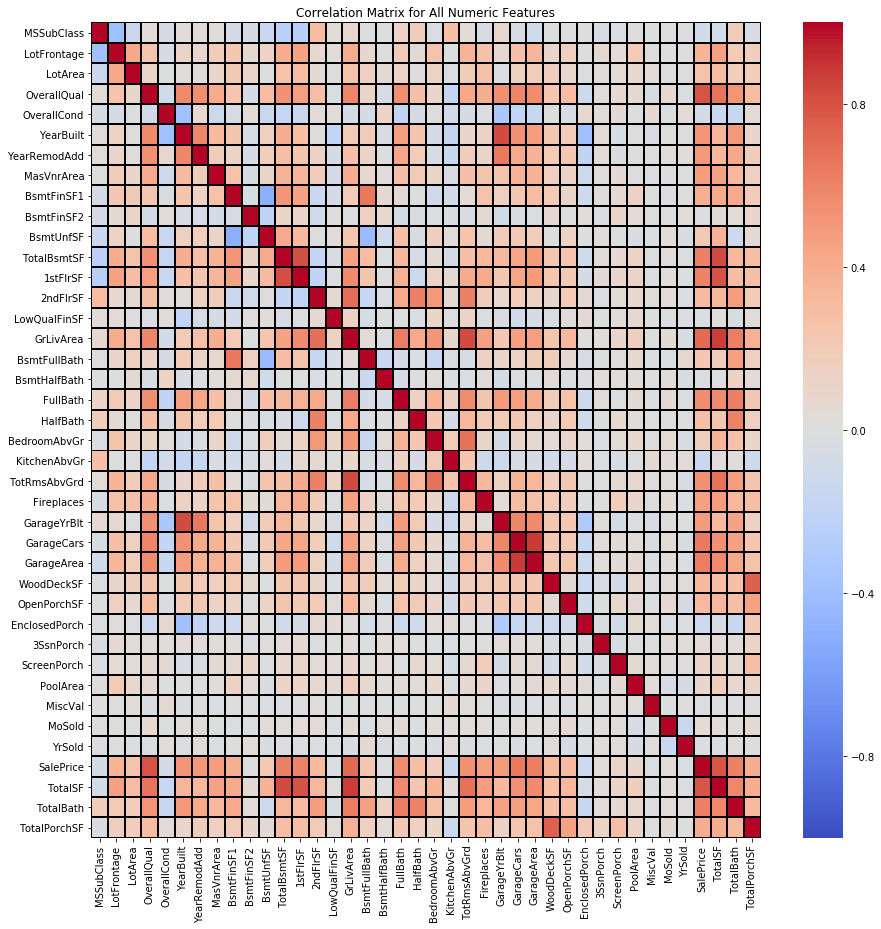

In [6]:
corr_matrix = data.corr()

plt.subplots(figsize=(15,15))
plt.title('Correlation Matrix for All Numeric Features')

sns.heatmap(corr_matrix, vmin=-1, vmax=1, center= 0, linewidth = 1, linecolor='black', cmap='coolwarm')

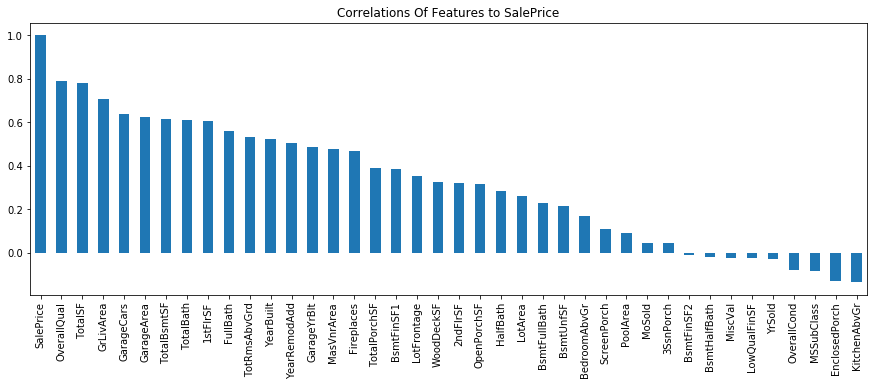

In [7]:
plt.subplots(figsize=(15,5))
plt.title('Correlations Of Features to SalePrice')
corr_matrix["SalePrice"].sort_values(ascending=False).plot.bar(x='Feature', y='Correlation')

## Analyze Distributions

In [8]:
print('SalePrice Skew : ' + str(data['SalePrice'].skew()))
print(data['SalePrice'].describe())

SalePrice Skew : 1.8828757597682124
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


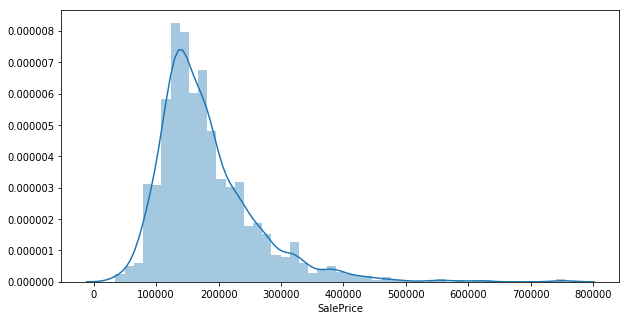

In [9]:
plt.subplots(figsize=(10,5))
sns.distplot(data['SalePrice'])

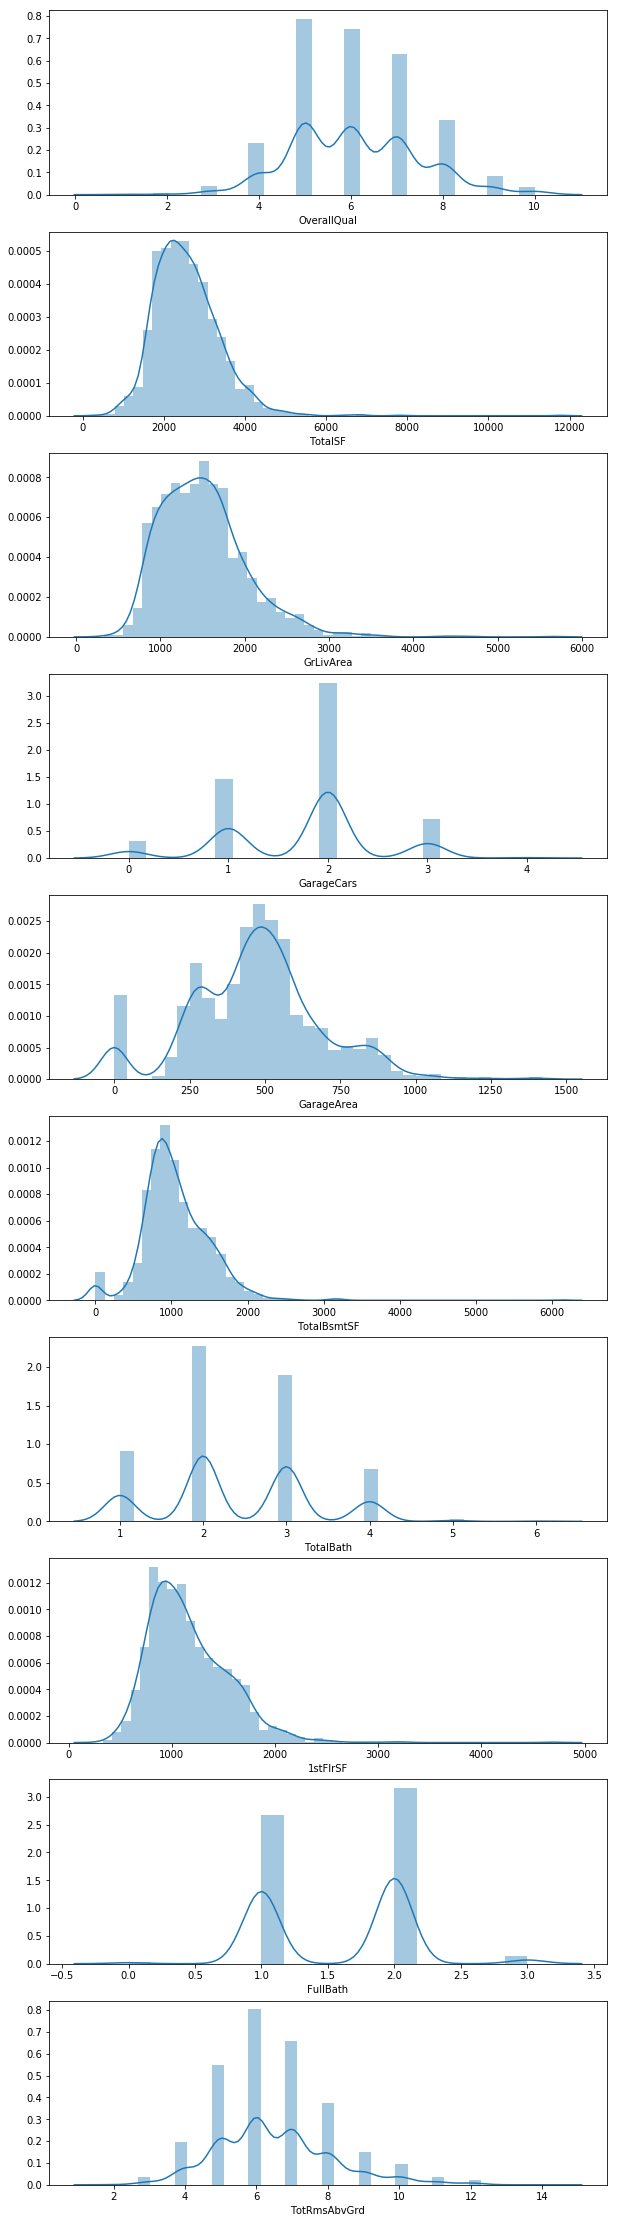

In [10]:
# Top ten features correlated to SalePrice

plt.subplots(figsize=(10,40))

plt.subplot(10, 1, 1)
ax = sns.distplot(data['OverallQual'])

plt.subplot(10, 1, 2)
ax = sns.distplot(data['TotalSF'])

plt.subplot(10, 1, 3)
ax = sns.distplot(data['GrLivArea'])

plt.subplot(10, 1, 4)
ax = sns.distplot(data['GarageCars'])

plt.subplot(10, 1, 5)
ax = sns.distplot(data['GarageArea'])

plt.subplot(10, 1, 6)
ax = sns.distplot(data['TotalBsmtSF'])

plt.subplot(10, 1, 7)
ax = sns.distplot(data['TotalBath'])

plt.subplot(10, 1, 8)
ax = sns.distplot(data['1stFlrSF'])

plt.subplot(10, 1, 9)
ax = sns.distplot(data['FullBath'])

plt.subplot(10, 1, 10)
ax = sns.distplot(data['TotRmsAbvGrd'])

## Transform Skewed Data


In [11]:
MIN_SKEW = 1

SalePrice Skew : -0.008654442199566365
count    1460.000000
mean        7.841602
std         0.158224
min         7.185194
25%         7.744377
50%         7.835085
75%         7.942079
max         8.409390
Name: SalePrice, dtype: float64


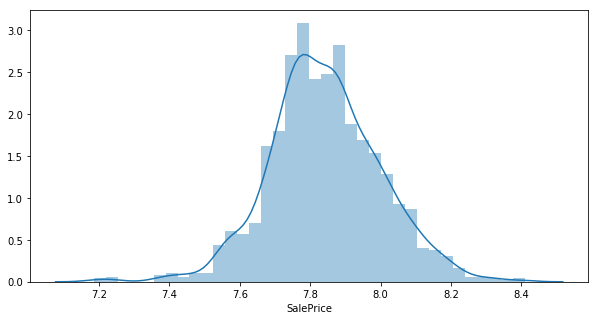

In [12]:
boxcox_dict = {}

data['SalePrice'] = data['SalePrice'] + 1
data['SalePrice'], boxcox_dict['SalePrice'] = stats.boxcox(data['SalePrice'] + 1)

print('SalePrice Skew : ' + str(data['SalePrice'].skew()))
print(data['SalePrice'].describe())

plt.subplots(figsize=(10,5))
sns.distplot(data['SalePrice'])

In [13]:
# Split features into types based on how we will preprocess them
# Refer to data_description.txt for more info on features

# Numeric features
# Note: The description is incorrect Kitchen and Bedroom are labeled KitchenAbvGr and BedroomAbvGr
num_features = ["LotFrontage", "LotArea", "YearBuilt", "OverallQual", "OverallCond", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF",
               "LowQualFinSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageYrBlt", 
                "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal", "YrSold","YearRemodAdd"]

# Categoric features that have simple, (a>b>c), correlations and can be ordinally encoded, NOTE: Be careful about order
cat_features_ordcorr = ["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC", "KitchenQual", "Functional", "FireplaceQu", 
                        "GarageFinish", "GarageQual", "GarageCond", "PavedDrive", "PoolQC", "Fence", "LotShape", "LandContour", "LandSlope"]

# Categoric features that likely don't have any correlation for use with one hot encoders
cat_features_uncorr = ["Street", "Alley", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "Foundation", "Heating", "Electrical", "CentralAir", "GarageType", 
                       "MiscFeature", "SaleType", "SaleCondition", "MSSubClass", "MSZoning", "Utilities", "LotConfig", "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle"]

# Features that may require different preprocessing steps than the above
# Dropping MoSold, month sold
odd_features = ["MoSold"]

data.drop(odd_features, axis=1, inplace=True)

# MSSubClass is a number but it's a categoric feature
data['MSSubClass'] = data['MSSubClass'].apply(str)

In [14]:
for feature in num_features:
    data[feature].fillna(data[feature].median(), inplace = True)
    test[feature].fillna(data[feature].median(), inplace = True)

In [15]:
data_skews = data[num_features].skew(axis = 0, skipna = True).sort_values(ascending=False)
data_skews

MiscVal          24.476794
PoolArea         14.828374
LotArea          12.207688
3SsnPorch        10.304342
LowQualFinSF      9.011341
KitchenAbvGr      4.488397
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
MasVnrArea        2.677616
LotFrontage       2.409147
OpenPorchSF       2.364342
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
TotalBsmtSF       1.524255
1stFlrSF          1.376757
GrLivArea         1.366560
BsmtUnfSF         0.920268
2ndFlrSF          0.813030
OverallCond       0.693067
TotRmsAbvGrd      0.676341
HalfBath          0.675897
Fireplaces        0.649565
BsmtFullBath      0.596067
OverallQual       0.216944
BedroomAbvGr      0.211790
GarageArea        0.179981
YrSold            0.096269
FullBath          0.036562
GarageCars       -0.342549
YearRemodAdd     -0.503562
YearBuilt        -0.613461
GarageYrBlt      -0.678333
dtype: float64

In [16]:
for feature, skew in zip(data_skews.index, data_skews.values):
    if skew >= MIN_SKEW or skew <= -(MIN_SKEW):
        
        data[feature], boxcox_dict[feature] = stats.boxcox(data[feature] + 1)
        test[feature] = stats.boxcox(test[feature] + 1, lmbda = boxcox_dict[feature])
        
data.skew(axis = 0, skipna = True).sort_values(ascending=False)

## Keep in mind that all box cox transformations have the +1 shift parameter

PoolArea         14.352680
3SsnPorch         7.613746
LowQualFinSF      7.299413
MiscVal           5.016528
BsmtHalfBath      3.859402
ScreenPorch       3.113266
BsmtFinSF2        2.425650
EnclosedPorch     2.047941
TotalSF           1.776700
MSSubClass        1.407657
TotalPorchSF      1.102313
BsmtUnfSF         0.920268
2ndFlrSF          0.813030
OverallCond       0.693067
TotRmsAbvGrd      0.676341
HalfBath          0.675897
Fireplaces        0.649565
BsmtFullBath      0.596067
MasVnrArea        0.426258
TotalBath         0.271760
TotalBsmtSF       0.232534
OverallQual       0.216944
BedroomAbvGr      0.211790
GarageArea        0.179981
LotFrontage       0.167283
WoodDeckSF        0.132275
YrSold            0.096269
FullBath          0.036562
LotArea           0.026569
GrLivArea         0.000171
1stFlrSF         -0.001106
SalePrice        -0.008654
OpenPorchSF      -0.014772
GarageCars       -0.342549
BsmtFinSF1       -0.411401
YearRemodAdd     -0.503562
YearBuilt        -0.613461
G

## Data Preprocessing

In [17]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

In [18]:
target_scaler = MinMaxScaler()
target_data = target_scaler.fit_transform(data['SalePrice'].to_numpy().reshape(-1, 1))

In [19]:
scaler = MinMaxScaler()
scaler.fit(data[num_features])

num_data = scaler.transform(data[num_features])
num_test = scaler.transform(test[num_features])

In [20]:
# For some reason the description lists 'NA' as a category but they're actual NaNs not the string 'NA'
for feature in cat_features_uncorr:
    data[feature].fillna('NA', inplace = True)
    test[feature].fillna('NA', inplace = True)

uncorr_data = pd.get_dummies(data=data[cat_features_uncorr])
uncorr_test = pd.get_dummies(data=test[cat_features_uncorr])

# Remove categories we haven't seen in the training data
uncorr_test = uncorr_test.reindex(columns = uncorr_data.columns, fill_value=0)

In [21]:
# Same as uncorr categoric features
for feature in cat_features_ordcorr:
    
    # These ones have NaNs but they don't have an NA category
    if feature in ['KitchenQual', 'Functional']:
        data[feature].fillna(data[feature].mode()[0], inplace = True)
        test[feature].fillna(test[feature].mode()[0], inplace = True)
    
    else:
        data[feature].fillna('NA', inplace = True)
        test[feature].fillna('NA', inplace = True)


# From the description.txt file
feature_cat_pairs = [('ExterQual', ['Po', 'Fa', 'TA', 'Gd', 'Ex']),
                     ('ExterCond', ['Po', 'Fa', 'TA', 'Gd', 'Ex']),
                     ('BsmtQual', ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']),
                     ('BsmtCond', ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']),
                     ('BsmtExposure', ['NA', 'No', 'Mn', 'Av', 'Gd']),
                     ('BsmtFinType1', ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']),
                     ('BsmtFinType2', ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']),
                     ('HeatingQC', ['Po', 'Fa', 'TA', 'Gd', 'Ex']),
                     ('KitchenQual', ['Po', 'Fa', 'TA', 'Gd', 'Ex']),
                     ('Functional', ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']),
                     ('FireplaceQu', ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']),
                     ('GarageFinish', ['NA', 'Unf', 'RFn', 'Fin']),
                     ('GarageQual', ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']),
                     ('GarageCond', ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']),
                     ('PavedDrive', ['N', 'P', 'Y']),
                     ('PoolQC', ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']),
                     ('Fence', ['NA', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv']),
                     ('LotShape', ['IR3', 'IR2', 'IR1', 'Reg']),
                     ('LandContour', ['Low', 'HLS', 'Bnk', 'Lvl']),
                     ('LandSlope', ['Sev', 'Mod', 'Gtl'])
                    ]

scaler = MinMaxScaler()
ordcorr_data = np.zeros((len(data), len(feature_cat_pairs)))
ordcorr_test = np.zeros((len(test), len(feature_cat_pairs)))

for i, pair in enumerate(feature_cat_pairs):
    
    enc = OrdinalEncoder(categories=[pair[1]])
    
    transformed_data = scaler.fit_transform(enc.fit_transform(data[pair[0]].to_numpy().reshape(-1, 1)))
    transformed_test = scaler.transform(enc.transform(test[pair[0]].to_numpy().reshape(-1, 1)))

    # Probably a better way to do this
    for j, value in enumerate(transformed_data):
            ordcorr_data[j][i] = value
            
    for j, value in enumerate(transformed_test):
            ordcorr_test[j][i] = value

## Models

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

In [23]:
def showPredInfo(train, train_pred, test, test_pred):
    
    print('Training RMSE : ' + str(np.sqrt(mean_squared_error(train, train_pred))))
    print('Validation RMSE : ' + str(np.sqrt(mean_squared_error(test, test_pred))))
    
    plt.subplots(figsize=(5,10))

    ax = plt.subplot(2, 1, 1)
    ax.plot([0,1], [0,1], color='cyan')
    ax.plot(train, train_pred, 'o', color='green')

    ax = plt.subplot(2, 1, 2)
    ax.plot([0,1], [0,1], color='cyan')
    ax.plot(test, test_pred, 'o', color='green')

    plt.show()

In [24]:
test_data = np.hstack((num_test, uncorr_test.to_numpy(), ordcorr_test))
full_data = np.hstack((num_data, uncorr_data.to_numpy(), ordcorr_data))

X_train, X_test, y_train, y_test = train_test_split(full_data, target_data, test_size=0.28, random_state=8)
y_train = np.ravel(y_train)

### Ridge Regression

Training RMSE : 0.03129712908479399
Validation RMSE : 0.0475534184753954


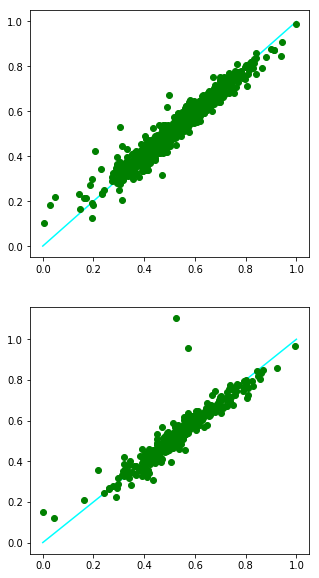

In [25]:
ridge = linear_model.Ridge(alpha=1.0)

ridge.fit(X_train, y_train)
ridge_train_pred = ridge.predict(X_train)
ridge_test_pred = ridge.predict(X_test)

showPredInfo(y_train, ridge_train_pred, y_test, ridge_test_pred)

### Lasso

Training RMSE : 0.0334397328719962
Validation RMSE : 0.044817022003172356


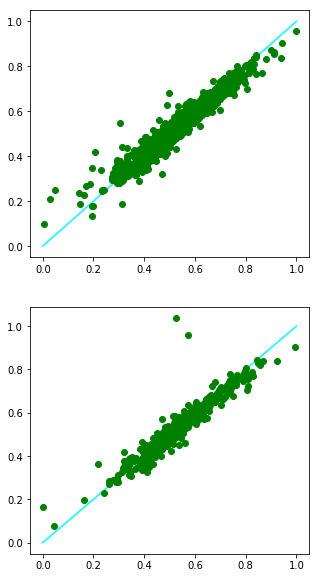

In [26]:
lasso = linear_model.LassoCV(cv=5)

lasso.fit(X_train, y_train)
lasso_train_pred = lasso.predict(X_train)
lasso_test_pred = lasso.predict(X_test)

showPredInfo(y_train, lasso_train_pred, y_test, lasso_test_pred)

### Elastic Net

Training RMSE : 0.03348184780270089
Validation RMSE : 0.04471871154035532


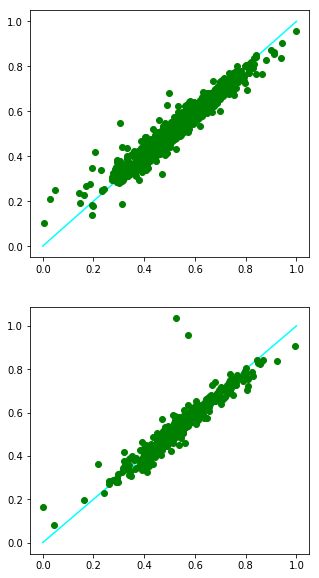

In [27]:
elastic = linear_model.ElasticNetCV(cv=5)

elastic.fit(X_train, y_train)
elastic_train_pred = elastic.predict(X_train)
elastic_test_pred = elastic.predict(X_test)

showPredInfo(y_train, elastic_train_pred, y_test, elastic_test_pred)

### Lars

Training RMSE : 0.03556841306155882
Validation RMSE : 0.04638982172668876


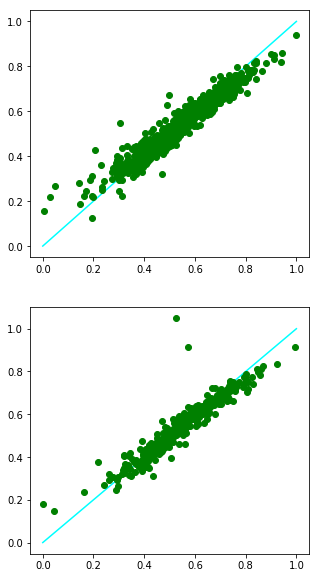

In [28]:
lars = linear_model.Lars(eps=1.2)

lars.fit(X_train, y_train)
lars_train_pred = lars.predict(X_train)
lars_test_pred = lars.predict(X_test)

showPredInfo(y_train, lars_train_pred, y_test, lars_test_pred)

### Bayesion Ridge

Training RMSE : 0.03157872052395054
Validation RMSE : 0.04692809187519145


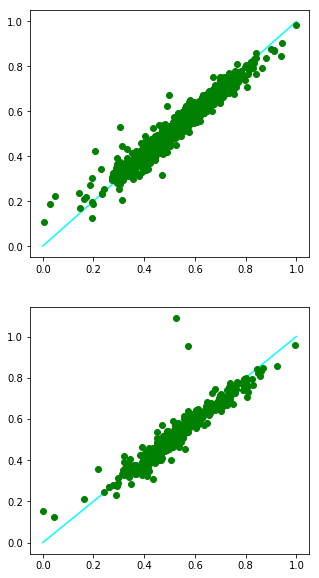

In [29]:
bRidge = linear_model.BayesianRidge()

bRidge.fit(X_train, y_train)
bRidge_train_pred = bRidge.predict(X_train)
bRidge_test_pred = bRidge.predict(X_test)

showPredInfo(y_train, bRidge_train_pred, y_test, bRidge_test_pred)

### ARD

Training RMSE : 0.0331331491564043
Validation RMSE : 0.05217040036937268


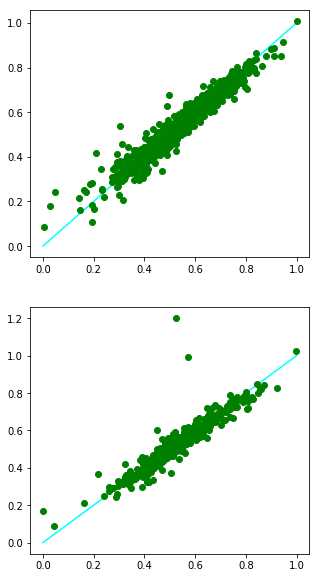

In [30]:
ard = linear_model.ARDRegression()

ard.fit(X_train, y_train)
ard_train_pred = ard.predict(X_train)
ard_test_pred = ard.predict(X_test)

showPredInfo(y_train, ard_train_pred, y_test, ard_test_pred)

### OMP

Training RMSE : 0.0372280560019554
Validation RMSE : 0.049564974928173244


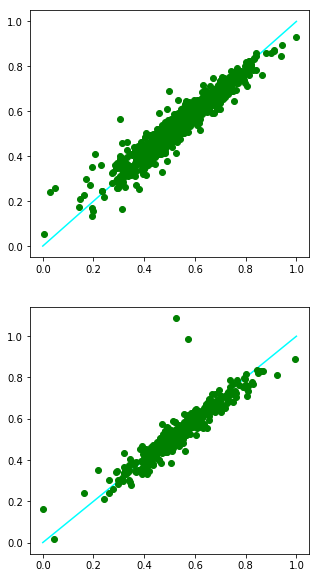

In [31]:
omp = linear_model.OrthogonalMatchingPursuitCV(cv=5)

omp.fit(X_train, y_train)
omp_train_pred = omp.predict(X_train)
omp_test_pred = omp.predict(X_test)

showPredInfo(y_train, omp_train_pred, y_test, omp_test_pred)

### Random Forest

Training RMSE : 0.019684074870889707
Validation RMSE : 0.04909562826674832


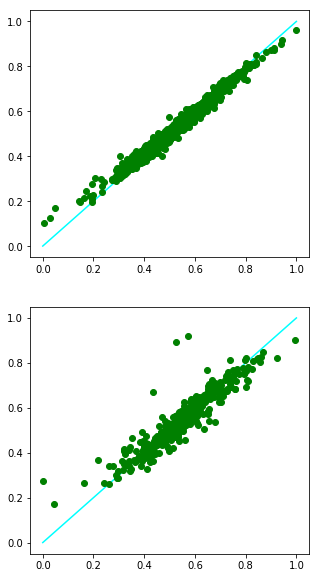

In [32]:
forest = ensemble.RandomForestRegressor(max_depth=10, n_estimators=1000, random_state=8)

forest.fit(X_train, y_train)
forest_train_pred = forest.predict(X_train)
forest_test_pred = forest.predict(X_test)

showPredInfo(y_train, forest_train_pred, y_test, forest_test_pred)

### Extra Trees

Training RMSE : 0.013657612257778624
Validation RMSE : 0.04644721089300715


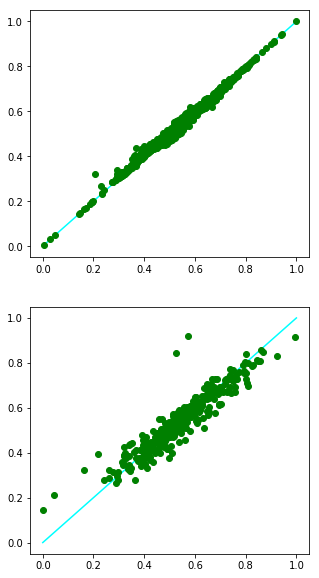

In [33]:
extra = ensemble.ExtraTreesRegressor(max_depth=10, n_estimators=1000, random_state=8)

extra.fit(X_train, y_train)
extra_train_pred = extra.predict(X_train)
extra_test_pred = extra.predict(X_test)

showPredInfo(y_train, extra_train_pred, y_test, extra_test_pred)

### Adaptive Boosting

Training RMSE : 0.0034632087954754075
Validation RMSE : 0.0501372307048192


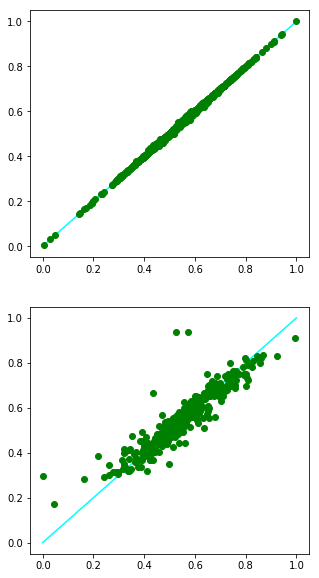

In [34]:
ada = ensemble.AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=12), 
                                 n_estimators=1000, random_state=8)

ada.fit(X_train, y_train)
ada_train_pred = ada.predict(X_train)
ada_test_pred = ada.predict(X_test)

showPredInfo(y_train, ada_train_pred, y_test, ada_test_pred)

### Gradient Boosting

Training RMSE : 0.026468861358571186
Validation RMSE : 0.05054385780631866


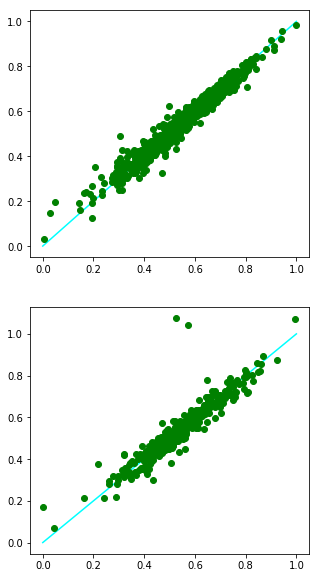

In [35]:
gbc = ensemble.GradientBoostingRegressor(n_estimators=1000, learning_rate=0.3, max_depth=1, random_state=8)

gbc.fit(X_train, y_train)
gbc_train_pred = gbc.predict(X_train)
gbc_test_pred = gbc.predict(X_test)

showPredInfo(y_train, gbc_train_pred, y_test, gbc_test_pred)

### Histogram Gradient Boosting

Training RMSE : 0.013630125792869924
Validation RMSE : 0.04549658553712254


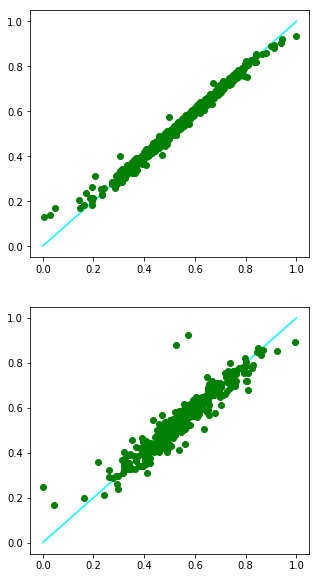

In [36]:
hgb = HistGradientBoostingRegressor(learning_rate=0.1)

hgb.fit(X_train, y_train)
hgb_train_pred = hgb.predict(X_train)
hgb_test_pred = hgb.predict(X_test)

showPredInfo(y_train, hgb_train_pred, y_test, hgb_test_pred)

### XGBoost

[22:38:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training RMSE : 0.028125727177295633
Validation RMSE : 0.04870920397167776


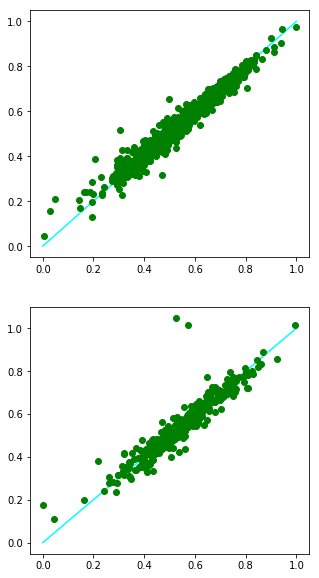

In [37]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.2, max_depth=1, random_state=8)

xgb.fit(X_train, y_train)
xgb_train_pred = xgb.predict(X_train)
xgb_test_pred = xgb.predict(X_test)

showPredInfo(y_train, xgb_train_pred, y_test, xgb_test_pred)

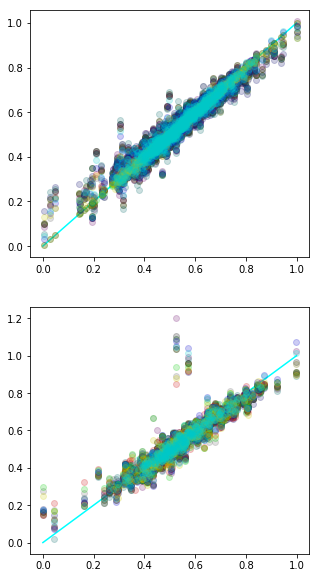

In [38]:
plt.subplots(figsize=(5,10))

ax = plt.subplot(2, 1, 1)
ax.plot([0,1], [0,1], color='cyan')
plt.plot(y_train, ridge_train_pred, 'o', color=(0.0, 0.0, 0.0), alpha=0.2)
plt.plot(y_train, lasso_train_pred, 'o', color=(0.4, 0.0, 0.0), alpha=0.2)
plt.plot(y_train, elastic_train_pred, 'o', color=(0.0, 0.4, 0.0), alpha=0.2)
plt.plot(y_train, lars_train_pred, 'o', color=(0.0, 0.0, 0.4), alpha=0.2)
plt.plot(y_train, bRidge_train_pred, 'o', color=(0.4, 0.4, 0.0), alpha=0.2)
plt.plot(y_train, ard_train_pred, 'o', color=(0.4, 0.0, 0.4), alpha=0.2)
plt.plot(y_train, omp_train_pred, 'o', color=(0.0, 0.4, 0.4), alpha=0.2)
plt.plot(y_train, forest_train_pred, 'o', color=(0.4, 0.4, 0.4), alpha=0.2)
plt.plot(y_train, extra_train_pred, 'o', color=(0.8, 0.0, 0.0), alpha=0.2)
plt.plot(y_train, ada_train_pred, 'o', color=(0.0, 0.8, 0.0), alpha=0.2)
plt.plot(y_train, gbc_train_pred, 'o', color=(0.0, 0.0, 0.8), alpha=0.2)
plt.plot(y_train, hgb_train_pred, 'o', color=(0.8, 0.8, 0.0), alpha=0.2)
plt.plot(y_train, xgb_train_pred, 'o', color=(0.0, 0.8, 0.8), alpha=0.2)

ax = plt.subplot(2, 1, 2)
ax.plot([0,1], [0,1], color='cyan')
plt.plot(y_test, ridge_test_pred, 'o', color=(0.0, 0.0, 0.0), alpha=0.2)
plt.plot(y_test, lasso_test_pred, 'o', color=(0.4, 0.0, 0.0), alpha=0.2)
plt.plot(y_test, elastic_test_pred, 'o', color=(0.0, 0.4, 0.0), alpha=0.2)
plt.plot(y_test, lars_test_pred, 'o', color=(0.0, 0.0, 0.4), alpha=0.2)
plt.plot(y_test, bRidge_test_pred, 'o', color=(0.4, 0.4, 0.0), alpha=0.2)
plt.plot(y_test, ard_test_pred, 'o', color=(0.4, 0.0, 0.4), alpha=0.2)
plt.plot(y_test, omp_test_pred, 'o', color=(0.0, 0.4, 0.4), alpha=0.2)
plt.plot(y_test, forest_test_pred, 'o', color=(0.4, 0.4, 0.4), alpha=0.2)
plt.plot(y_test, extra_test_pred, 'o', color=(0.8, 0.0, 0.0), alpha=0.2)
plt.plot(y_test, ada_test_pred, 'o', color=(0.0, 0.8, 0.0), alpha=0.2)
plt.plot(y_test, gbc_test_pred, 'o', color=(0.0, 0.0, 0.8), alpha=0.2)
plt.plot(y_test, hgb_test_pred, 'o', color=(0.8, 0.8, 0.0), alpha=0.2)
plt.plot(y_test, xgb_test_pred, 'o', color=(0.0, 0.8, 0.8), alpha=0.2)

plt.show()

### Voting Regressor

[22:40:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training RMSE : 0.02318934215074314
Validation RMSE : 0.04458067161478563


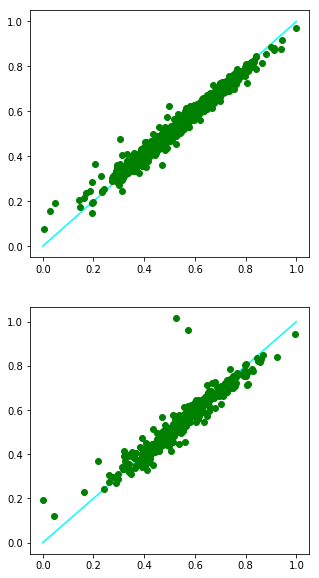

In [39]:
# (bRidge, 'bRidge'), doesn't like this one for some reason
vote = VotingRegressor([('ridge', ridge), ('lasso', lasso), ('elastic', elastic),
                        ('lars', lars), ('ard', ard), ('omp', omp),  ('gbc', gbc),
                        ('forest', forest), ('extra', extra), ('ada', ada),
                        ('hgb', hgb), ('xgb', xgb)])

vote.fit(X_train, y_train)
vote_train_pred = vote.predict(X_train)
vote_test_pred = vote.predict(X_test)

showPredInfo(y_train, vote_train_pred, y_test, vote_test_pred)

## Submission

In [40]:
from scipy.special import inv_boxcox

In [41]:
vote.fit(full_data, np.ravel(target_data))
sub_pred = vote.predict(test_data)

sub_pred = target_scaler.inverse_transform(sub_pred.reshape(-1, 1))
sub_pred = inv_boxcox(sub_pred, boxcox_dict['SalePrice']) + 1

submission = pd.DataFrame({'Id' : test['Id'], 'SalePrice' : np.ravel(sub_pred)})
submission.to_csv('submission.csv', index=False)

[22:42:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
